In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory("training",
                                          target_size = (200,200),
                                          batch_size = 100,
                                          class_mode = 'binary'
)
validation_dataset =train.flow_from_directory("validation",
                                          target_size = (200,200),
                                          batch_size = 20,
                                          class_mode = 'binary')

Found 322 images belonging to 2 classes.
Found 53 images belonging to 2 classes.


In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [7]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(200,200,3))
base_model.trainable = False ## Not trainable weights

In [8]:
model=Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,'relu'),
    tf.keras.layers.Dense(1,'softmax')
])

In [9]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])

In [10]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch =3,
                     epochs = 30,
                     validation_data=validation_dataset,
                     verbose=1)

Epoch 1/30
3/3 - 48s - loss: 3.1212 - accuracy: 0.5946 - val_loss: 1.1650 - val_accuracy: 0.4906 - 48s/epoch - 16s/step
Epoch 2/30
3/3 - 45s - loss: 1.4299 - accuracy: 0.5676 - val_loss: 1.3228 - val_accuracy: 0.4906 - 45s/epoch - 15s/step
Epoch 3/30
3/3 - 41s - loss: 0.9594 - accuracy: 0.6036 - val_loss: 0.5370 - val_accuracy: 0.4906 - 41s/epoch - 14s/step
Epoch 4/30
3/3 - 43s - loss: 0.7031 - accuracy: 0.5676 - val_loss: 0.8314 - val_accuracy: 0.4906 - 43s/epoch - 14s/step
Epoch 5/30
3/3 - 42s - loss: 0.5228 - accuracy: 0.5856 - val_loss: 0.3388 - val_accuracy: 0.4906 - 42s/epoch - 14s/step
Epoch 6/30
3/3 - 37s - loss: 0.4036 - accuracy: 0.5721 - val_loss: 0.4700 - val_accuracy: 0.4906 - 37s/epoch - 12s/step
Epoch 7/30
3/3 - 38s - loss: 0.4607 - accuracy: 0.5766 - val_loss: 0.3597 - val_accuracy: 0.4906 - 38s/epoch - 13s/step
Epoch 8/30
3/3 - 37s - loss: 0.3478 - accuracy: 0.5901 - val_loss: 0.3018 - val_accuracy: 0.4906 - 37s/epoch - 12s/step
Epoch 9/30
3/3 - 38s - loss: 0.3201 - ac

In [11]:
loss, accuracy = model.evaluate(train_dataset, verbose=1)
loss_v, accuracy_v = model.evaluate(validation_dataset, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

3/3 [==============================] - 7s 2s/step - loss: 0.0939 - accuracy: 0.4906
Validation: accuracy = 0.490566  ;  loss_v = 0.093852
Test: accuracy = 0.577640  ;  loss = 0.082950


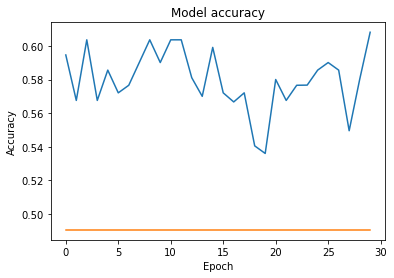

In [12]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

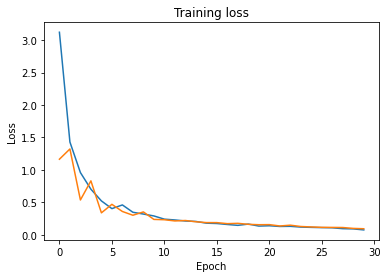

In [13]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [14]:
tf.saved_model.save(model,'vgg-16')

INFO:tensorflow:Assets written to: vgg-16\assets


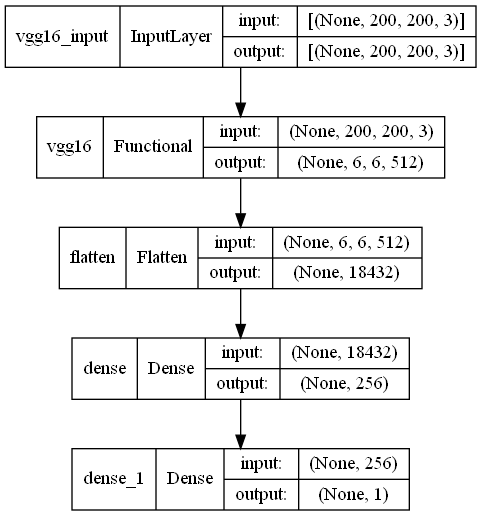

In [15]:
img_file = './model_arch2.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)